In [1]:
require './moromoro'

true

In [2]:
a_df = <<DATA.to_df
m[kg], x[cm], N , y[cm], time[s]
0.35,  5,     30, 30.1 , 34.31
0.35,  5,     30, 35.1 , 36.37
0.35,  5,     30, 40.1 , 38.30
0.35,  5,     30, 45.1 , 40.14
0.35,  5,     30, 50.1 , 42.05
0.35,  5,     30, 55.1 , 43.85
0.35,  5,     30, 60.1 , 45.89
DATA

m[kg],x[cm],N,y[cm],time[s]
0.35,5.0,30.0,30.1,34.31
0.35,5.0,30.0,35.1,36.37
0.35,5.0,30.0,40.1,38.3
0.35,5.0,30.0,45.1,40.14
0.35,5.0,30.0,50.1,42.05
0.35,5.0,30.0,55.1,43.85
0.35,5.0,30.0,60.1,45.89


In [3]:
def f_model(y)
  g = 9.797 # m/s^2
  1.to_f/ (2*Math::PI) * Math.sqrt(g/y)
end

:f_model

In [4]:
a_with_calc_df = a_df.map do |row|
  t = row['time[s]'].to_f / row['N'].to_f
  f = 1/t
  y = row['y[cm]'] / 100.to_f
  x = row['x[cm]'] / 100.to_f
  row.merge(
    'y[m]' => y,
    'x[m]' => x,
    'T[s]' => t,
    'f[Hz]' => f,
    'f_model[Hz]' => f_model(y),
    'f_relative_error[%]' => (f_model(y) - f).abs/ f_model(y) * 100
  )
end.to_a.to_df

m[kg],x[cm],N,y[cm],time[s],y[m],x[m],T[s],f[Hz],f_model[Hz],f_relative_error[%]
0.35,5.0,30.0,30.1,34.31,0.301,0.05,1.1436666666666668,0.8743806470416787,0.9079949599505865,3.702037389143341
0.35,5.0,30.0,35.1,36.37,0.35100000000000003,0.05,1.2123333333333333,0.8248556502612043,0.8408395428705104,1.9009444482997666
0.35,5.0,30.0,40.1,38.3,0.401,0.05,1.2766666666666666,0.783289817232376,0.7866734613250321,0.4301205339960101
0.35,5.0,30.0,45.1,40.14,0.451,0.05,1.338,0.7473841554559043,0.7417856280893437,0.7547365646569693
0.35,5.0,30.0,50.1,42.05,0.501,0.05,1.4016666666666666,0.713436385255648,0.7037976667768022,1.3695297574640224
0.35,5.0,30.0,55.1,43.85,0.551,0.05,1.4616666666666667,0.6841505131128849,0.6711056362600124,1.943788898208327
0.35,5.0,30.0,60.1,45.89,0.601,0.05,1.5296666666666667,0.653737197646546,0.6425833223660736,1.7357866119840168


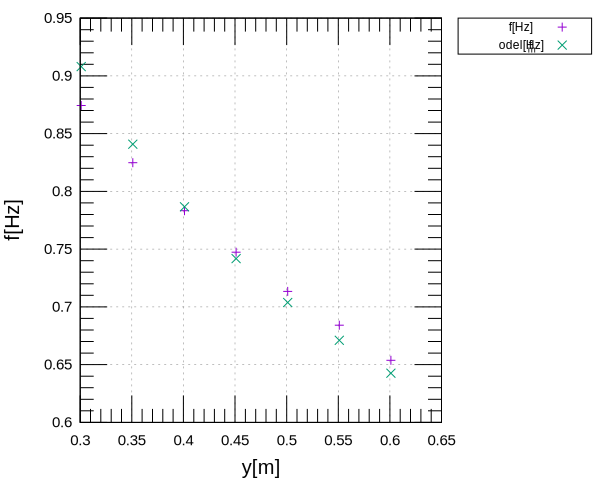

In [5]:
a_with_calc_df.plot(
  targets: [{ x: 'y[m]', y: 'f[Hz]' }, { x: 'y[m]', y: 'f_model[Hz]' }],
  options: {},
  file: 'graph/a.png'
)

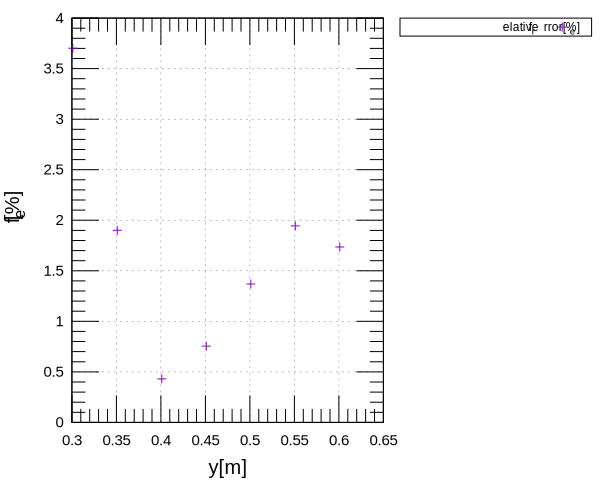

In [6]:
a_with_calc_df.plot(
  targets: [{ x: 'y[m]', y: 'f_relative_error[%]' }],
  options: {
      yl: 'f_e[%]'
  },
  file: 'graph/a.png'
)

In [7]:
b_df = <<DATA.to_df
s_a_dash[mm], s_b_dash[mm]
-10, -0.8
-20, -2.0
-30, -2.9
-40, -4.0
-50, -4.9
-60, -5.5
-70, -6.8
-80, -8.0
-90, -8.9
10, 1.0
20, 2.1
25, 2.9
30, 3.5
35, 3.8
40, 4.1
45, 4.7
50, 5.0
55, 5.8
60, 6.3
65, 7.0
70, 7.5
75, 7.8
80, 8.0
85, 9.0
90, 9.4
DATA
nil

In [8]:
def s_to_theta(s)
  r = 63.5 * 10 **(-2)
  s / r
end

:s_to_theta

In [9]:
s_a_0 = 3.5 * 10**(-3)
s_b_0 = 1.0 * 10**(-3)

b_with_calc_df = b_df.map do |row|
  s_a = (row['s_a_dash[mm]'] * 10**(-3) - s_a_0)
  s_b = (row['s_b_dash[mm]'] * 10**(-3) - s_b_0)
  theta_a = s_to_theta(s_a)
  theta_b = s_to_theta(s_b)
  row.merge(
    's_a' => s_a,
    's_b' => s_b,
    'theta_a' => theta_a,
    'theta_b' => theta_b,
    'sin_theta_b' => Math.sin(theta_b),
    'delta_theta' => theta_a - theta_b
  )
end.to_a.to_df
nil

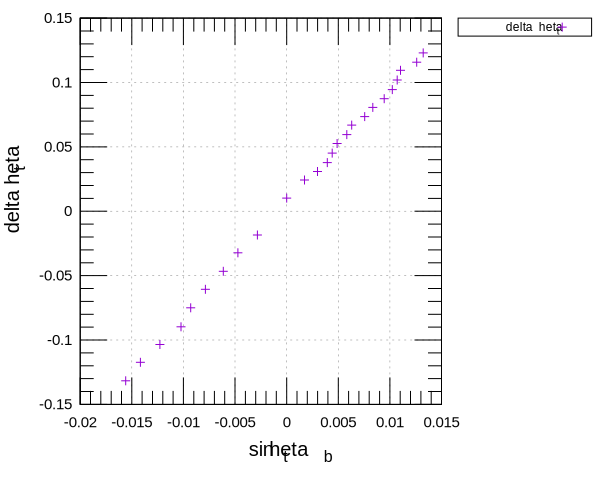

In [10]:
b_with_calc_df.plot(
  targets: [{ x: 'sin_theta_b', y: 'delta_theta' }],
  options: {},
  file: 'graph/b.png'
)

In [11]:
b_slope = b_with_calc_df.slope(x: 'sin_theta_b', y: 'delta_theta')

8.854226559826333

In [12]:
b_slope_error = b_with_calc_df.slope_error(x: 'sin_theta_b', y: 'delta_theta')

0.000547080795105795

In [13]:
b_segment = b_with_calc_df.segment(x: 'sin_theta_b', y: 'delta_theta')

0.00688400981627587

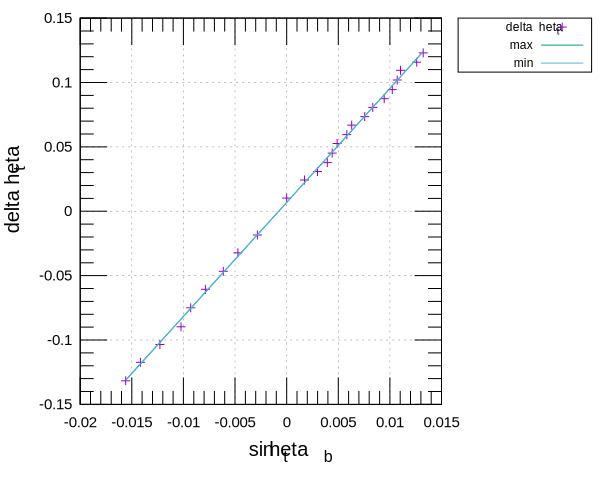

In [16]:
b_with_calc_df.map do |row|
  row.merge(
    'max' => row['sin_theta_b'] * (b_slope + b_slope_error) + b_segment,
    'min' => row['sin_theta_b'] * (b_slope - b_slope_error) + b_segment
  )
end.to_a.to_df.plot(
  targets: [{ x: 'sin_theta_b', y: 'delta_theta' }, { x: 'sin_theta_b', y: 'max', with: :line }, { x: 'sin_theta_b', y: 'min', with: :line }],
  options: {},
  file: 'graph/b.png'
)